In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import cluster
from sklearn.model_selection import train_test_split, KFold
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AgglomerativeClustering

In [3]:
df = pd.read_pickle('data/sf_inspection.pkl')

In [4]:
df.head(2)

,business_id,business_name,business_address,business_city,business_state,business_postal_code,business_latitude,business_longitude,business_location,business_phone_number,...,94129,94130,94131,94132,94133,94134,94143,94158,95105,p10_36
0,1757,Dar Bar Pakistani/Indian Cusine,1412 Polk St,San Francisco,CA,94109,37.789784,-122.420455,"(37.789784, -122.420455)",NaN,...,0,0,0,0,0,0,0,0,0,11
1,4864,DRAGON CITY BAKERY & CAFE,2367 MISSION St,San Francisco,CA,94110,37.759174,-122.419066,"(37.759174, -122.419066)",1.415583e+10,...,0,0,0,0,0,0,0,0,0,13


## Assign average values to the missing longitude and latitude values

In [5]:
mask = df['business_latitude'].isnull().values

In [6]:
sum_latitude = df['business_latitude'].loc[~mask].values.astype(float).sum()
len_latitude = len(df['business_latitude'].loc[~mask].values)
avg_latitude = sum_latitude/len_latitude
avg_latitude

37.7733176329152

In [7]:
sum_longitude = df['business_longitude'].loc[~mask].values.astype(float).sum()
len_longitude = len(df['business_longitude'].loc[~mask].values)
avg_longitude = sum_longitude/len_longitude
avg_longitude

-122.425022521273

In [8]:
df.loc[mask,'business_latitude'] = avg_latitude
df.loc[mask,'business_longitude'] = avg_longitude

## 2-dim plot

In [12]:
# get rid of two wrong geo locations
mask_80 = df['business_longitude'].values.astype(float) > -80.
df.loc[mask_80]

,business_id,business_name,business_address,business_city,business_state,business_postal_code,business_latitude,business_longitude,business_location,business_phone_number,...,94129,94130,94131,94132,94133,94134,94143,94158,95105,p10_36


In [13]:
df2 = df.loc[~mask_80]
len(df2)

4689

In [14]:
df2['business_longitude'].values > -122.375

array([False, False, False, ..., False, False, False])

In [112]:
a = df2['business_longitude'].values
b = df2['business_latitude'].values

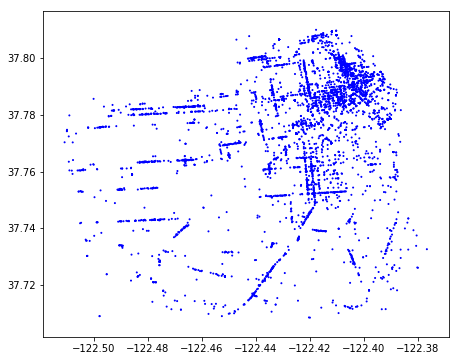

In [113]:
#fig = plt.figure
fig = plt.figure(figsize=(16,6))
ax1 = fig.add_subplot(121)

#ax=fig.add
# a = np.random.randint(1000, size=50)
# b = np.random.randint(1000, size=50)
col = np.where((a+b) % 2== 0, 'r','b')
ax1.scatter(a, b, c=col, s=1)

In [116]:
x = np.array(a)
y = np.array(b)
ylabel = df2['y_label'].values

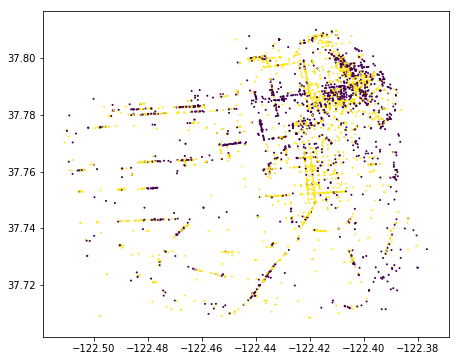

In [117]:
fig = plt.figure(figsize = (16,6))
ax1 = fig.add_subplot(121)
ax1.scatter(x,y, c=ylabel, s=1)

In [93]:
y = df2['y_label']
X = df2[['business_longitude', 'business_latitude']]

In [94]:
X_tr, X_test, y_tr, y_test = train_test_split(X, y, test_size=0.25, random_state=38)

In [95]:
X_train, X_validation, y_train, y_validation = train_test_split(X_tr, y_tr, test_size=0.25, random_state=28)

In [96]:
kscore = []
for n in range(11,50, 1):
    K_means = cluster.KMeans(n_clusters=n)
    K_means.fit(X_train)
    asum = sum(K_means.labels_ == y_train)/len(y_train)
    kscore.append(asum)
    

In [71]:
# print(K_means.labels_[::10])
# print(y_train[::10])

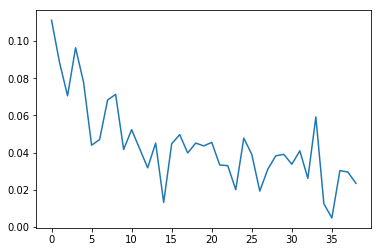

In [97]:
plt.plot(kscore)

## Find 60 centroids and their members

In [102]:
# number of clusters = 60 (twice number of zip codes)
K_means = cluster.KMeans(n_clusters=50)
K_means.fit(X_train)
sum(K_means.labels_ == y_train)/len(y_train)    

0.05688282138794084

In [103]:
ccenters = K_means.cluster_centers_

In [104]:
ccenters[0]

array([-122.49674489,   37.7356363 ])

In [105]:
ccenters[0].argsort()

array([0, 1])

array([0, 1])

In [83]:
for i in range(40):
    a = ccenters[i].argsort()
    b = list(a[-10:])
    c = [vect.get_feature_names()[x] for x in b]
    print(c)

NameError: name 'vect' is not defined

In [81]:
ccenters[1]

array([ 5.17241379e-02,  1.98275862e+00,  2.79310345e+00,  1.37931034e-01,
       -1.22432574e+02,  3.77577686e+01])

In [75]:
len(K_means.labels_)

2637

## SpectralClustering

In [107]:
spectral = cluster.SpectralClustering(n_clusters=50)
spectral.fit(X_train)
sum(spectral.labels_ == y_train)/len(y_train) 

0.11642017444065225

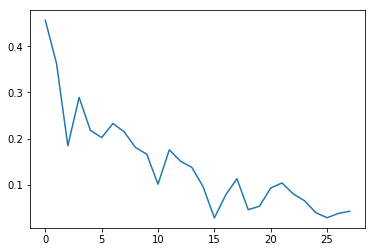

In [68]:
spscore = []
for n in range(2, 30, 1):
    spectral = cluster.SpectralClustering(n_clusters=n)
    spectral.fit(X_train)
    asum = sum(spectral.labels_ == y_train)/len(y_train) 
    spscore.append(asum)
plt.plot(spscore)